ECML article 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

#BOLIVAR

In [0]:
datos =  pd.read_csv("bolivar.csv")
datos

/content/drive/My Drive/bioacustica/Resultadosenero07


,name,ACIf,ESM,MD,NDSI,MID,FM,WE,CF,SC,SB,Tonnets,ADIm1,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,label,hora,etapa,grabadora,zone
0,/media/microp/DavidDD/bioacustica/2016/5067/20...,0.892706,0.856278,0.333183,0.996827,0.153374,0.661727,0.034530,0.001219,0.362491,0.619287,0.772133,0.914494,0.935664,0.717790,0.898397,0.645474,0.809112,0.627928,0.736445,0.883784,1,0,4,/ESPAN5067__0__2016,b
1,/media/microp/DavidDD/bioacustica/2016/5067/20...,0.892689,0.849345,0.332714,0.995790,0.153374,0.653551,0.043956,0.015348,0.362374,0.640530,0.780956,0.913795,0.919657,0.749596,0.846422,0.618931,0.766952,0.674475,0.701438,0.538745,1,0,4,/ESPAN5067__0__2016,b
2,/media/microp/DavidDD/bioacustica/2016/5067/20...,0.892532,0.883410,0.343941,0.994342,0.153374,0.667842,0.046574,0.000777,0.360499,0.644262,0.604594,0.882703,0.942878,0.833048,0.894844,0.661002,0.765344,0.684523,0.828174,0.912517,1,0,4,/ESPAN5067__0__2016,b
3,/media/microp/DavidDD/bioacustica/2016/5067/20...,0.893969,0.872079,0.338332,0.994927,0.153374,0.665852,0.048174,0.000657,0.365982,0.631258,0.761992,0.897772,0.930704,0.867027,0.891509,0.642647,0.772345,0.672453,0.756394,0.895355,1,0,4,/ESPAN5067__0__2016,b
4,/media/microp/DavidDD/bioacustica/2016/5067/20...,0.893771,0.871869,0.332844,0.996601,0.153374,0.661596,0.036865,0.000963,0.365211,0.604857,0.765045,0.942699,0.922719,0.807180,0.859638,0.642277,0.789608,0.684477,0.814735,0.752579,1,0,4,/ESPAN5067__0__2016,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14262,/home/david/Música/Bioacustica/2016/5072/20160...,0.888617,0.922066,0.361778,0.757846,0.092025,0.673834,0.102329,0.008380,0.214499,0.706301,0.572109,0.852253,0.852278,0.851112,0.858536,0.817793,0.898782,0.735839,0.774186,0.878673,1,21,4,4/GUAM5072__0__2016,b
14263,/home/david/Música/Bioacustica/2016/5072/20160...,0.892509,0.942935,0.366825,0.962168,0.119632,0.678541,0.130556,0.001318,0.222065,0.681862,0.581541,0.972626,0.872201,0.864640,0.789343,0.850748,0.692949,0.808392,0.889182,0.923341,1,21,4,4/GUAM5072__0__2016,b
14264,/home/david/Música/Bioacustica/2016/5072/20160...,0.889718,0.867835,0.356152,0.557156,0.000000,0.679095,0.239281,0.000953,0.208378,0.716956,0.562998,0.838047,0.768946,0.719321,0.680666,0.656380,0.749576,0.832388,0.822860,0.769835,1,11,2,4/GUAM5072__0__2016,b
14265,/home/david/Música/Bioacustica/2016/5072/20160...,0.890578,0.928419,0.362309,0.590229,0.000000,0.690011,0.303809,0.005276,0.217777,0.734168,0.556148,0.871274,0.832689,0.509428,0.725984,0.818711,0.812188,0.890610,0.849255,0.884710,1,12,2,4/GUAM5072__0__2016,b


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


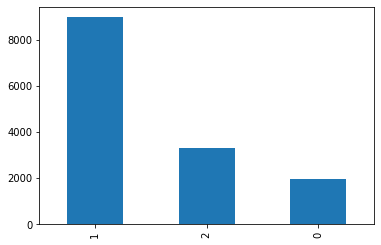

In [0]:
dafos=datos.drop_duplicates(subset=['ACIf', 'ESM','MD'],keep=False)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datos.iloc[:,1:21] = scaler.fit_transform(datos.iloc[:,1:21])
normalized_df = datos[datos.label != 'na']
normalized_df['label'].value_counts().plot(kind='bar')

In [0]:
normalized_df['label'].value_counts()

1    8972
2    3314
0    1981
Name: label, dtype: int64

# Feature selection


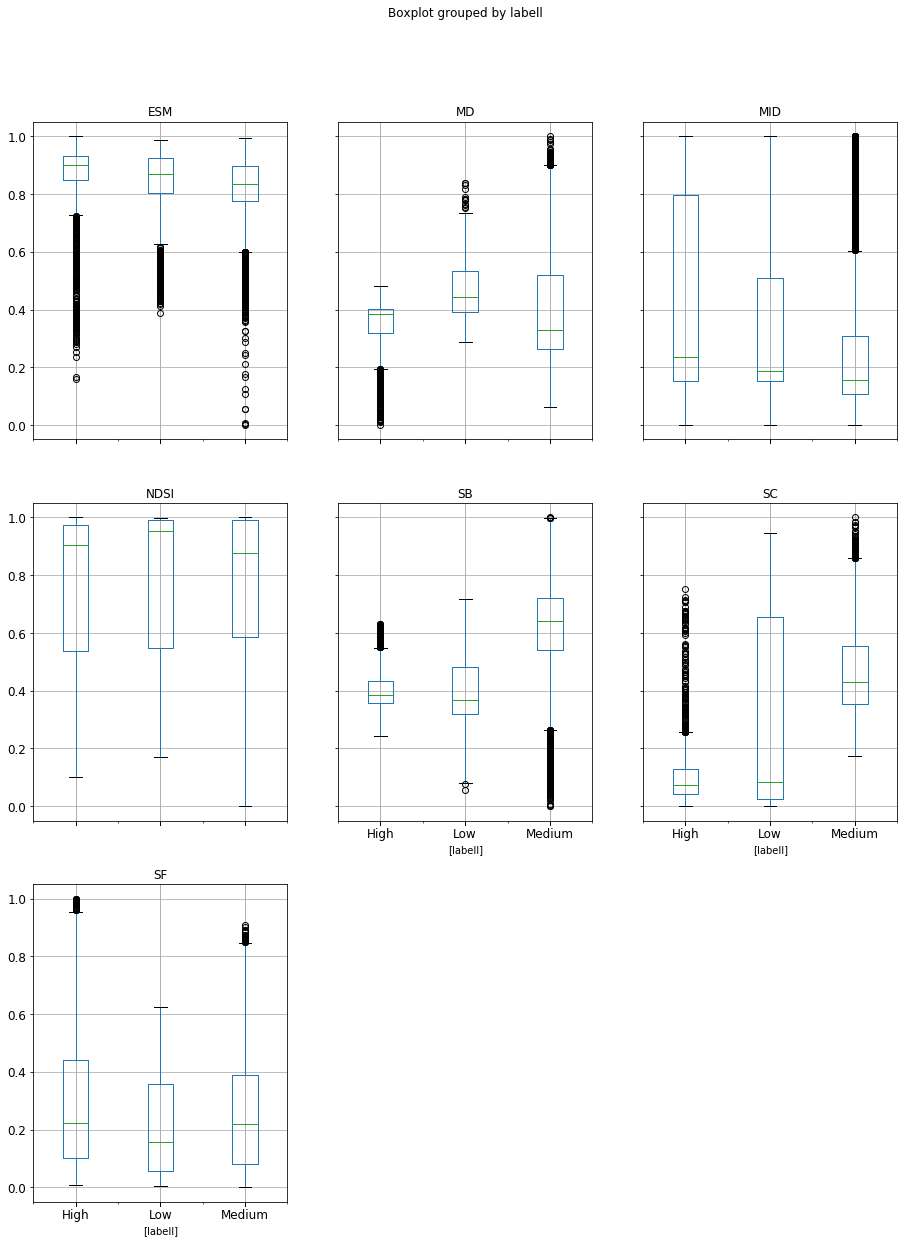

In [0]:
scalxlabel=normalized_df.copy()
trans={2:'High',0:'Low',1:'Medium'}
datay=[trans[item] for item in scalxlabel.label]
scalxlabel['labell']=datay
scalxlabel=scalxlabel[[ 'ESM', 'MD', 'NDSI', 'MID', 'WE', 'SC',
       'SB','labell']]
scalxlabel = scalxlabel.rename({'WE': 'SF'}, axis=1)
fig=scalxlabel.boxplot(figsize = (15,20),by='labell',fontsize='large')

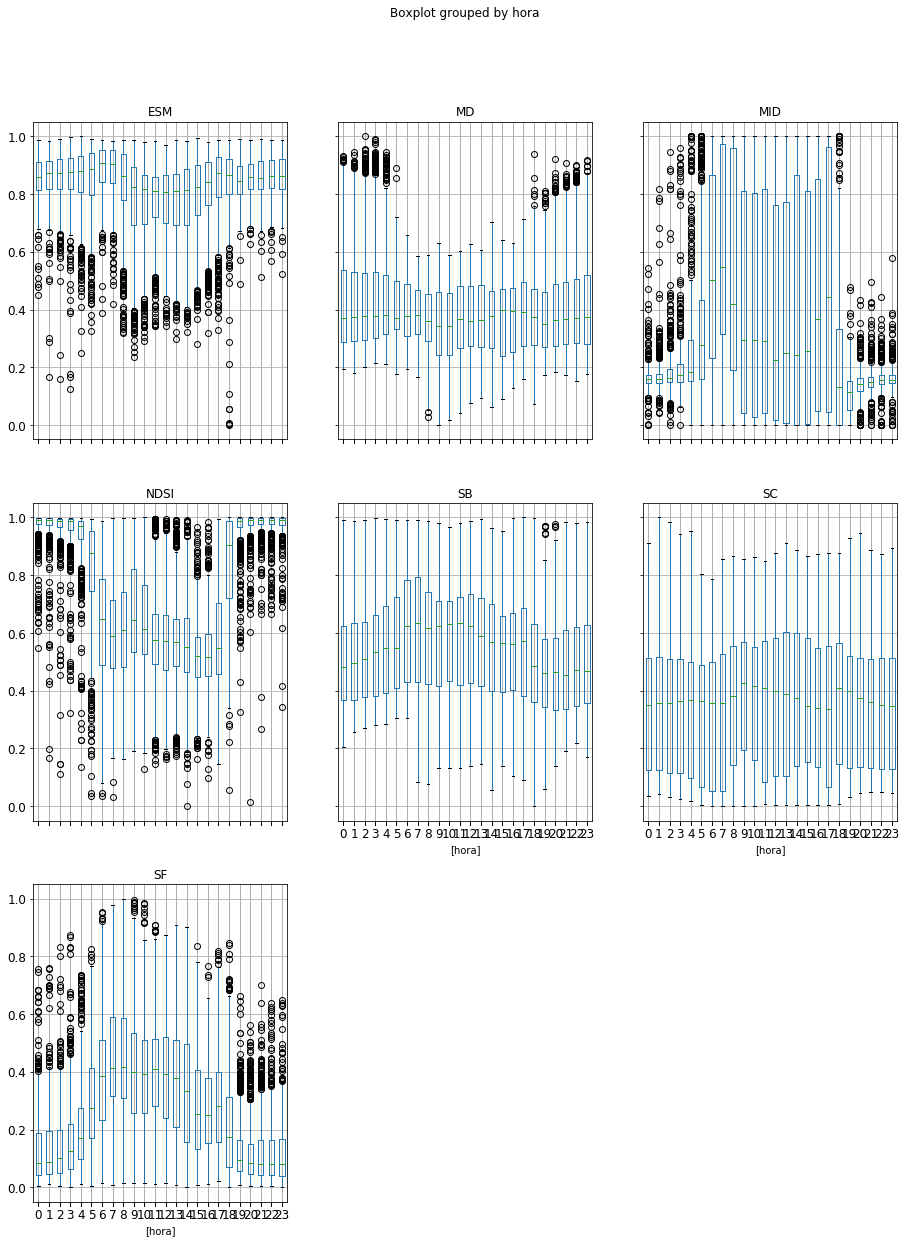

In [0]:
scalxlabel=normalized_df.copy()
trans={2:'alta',0:'baja',1:'media'}
datay=[trans[item] for item in scalxlabel.label]
scalxlabel['labell']=datay
scalxlabel=scalxlabel[[ 'ESM', 'MD', 'NDSI', 'MID', 'WE', 'SC',
       'SB','hora']]
scalxlabel = scalxlabel.rename({'WE': 'SF'}, axis=1)
fig=scalxlabel.boxplot(figsize = (15,20),by='hora',fontsize='large')

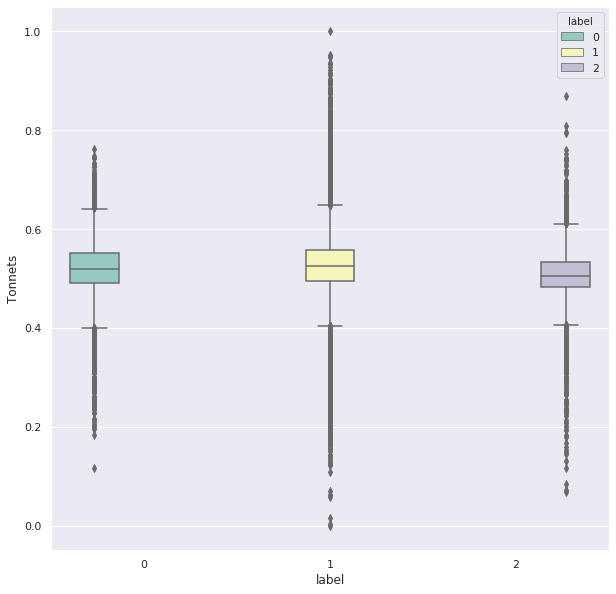

In [0]:

sns.set(rc={'figure.figsize':(10,10)})
ax = sns.boxplot(x="label", y="Tonnets", hue="label", data=normalized_df, palette="Set3")

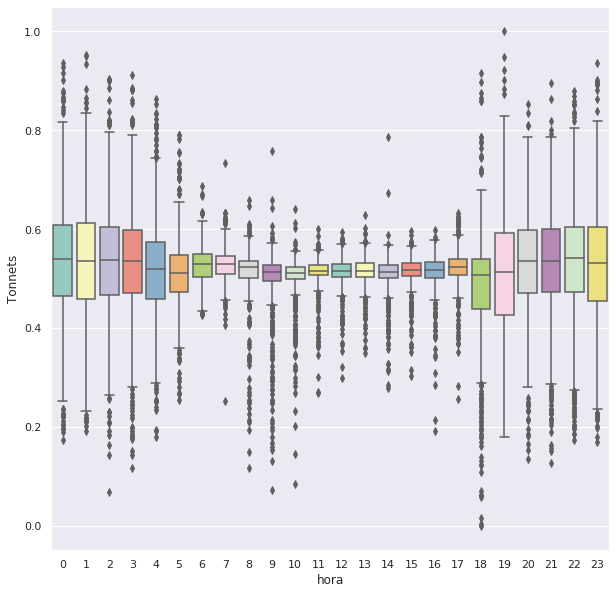

In [0]:
import seaborn as sns
ax = sns.boxplot(x="hora", y="Tonnets", data=normalized_df, palette="Set3")

In [0]:
X=normalized_df.iloc[:,1:21]
y=normalized_df.label

In [0]:
from sklearn.feature_selection import f_classif

fval=f_classif(X, y)[0]
fval

array([3.03645302e+01, 1.78582879e+02, 3.36997022e+02, 1.22137893e+01,
       3.52969470e+02, 2.10144481e+02, 8.15919038e+01, 5.12854509e+02,
       4.38616387e+03, 3.73758326e+03, 7.15898481e+01, 8.21958504e+02,
       4.76337858e+02, 2.32472205e+02, 2.26078374e+02, 1.10575158e+02,
       6.64247354e+01, 1.41901378e+02, 3.35767988e+01, 3.26340559e-01])

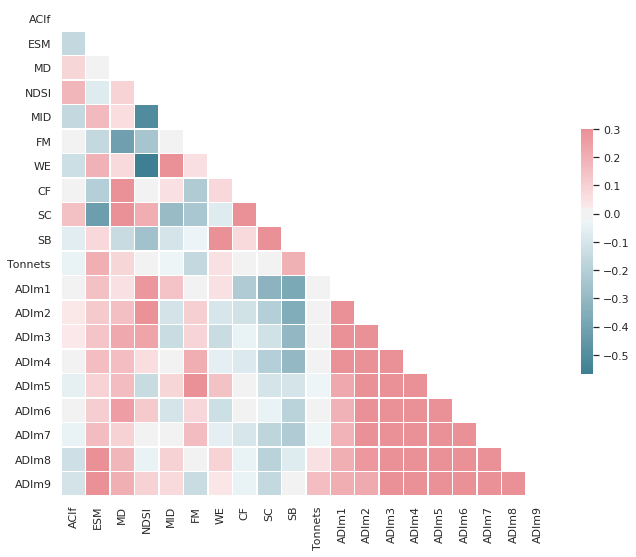

In [0]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset

# Compute the correlation matrix
corr = normalized_df.iloc[:,1:21].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
normalized_df

,name,ACIf,ESM,MD,NDSI,MID,FM,WE,CF,SC,SB,Tonnets,ADIm1,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,label,hora,etapa,grabadora,zone
0,/media/microp/DavidDD/bioacustica/2016/5067/20...,0.905097,0.854634,0.281328,0.996915,0.153374,0.389293,0.045856,0.001219,0.375167,0.587507,0.805428,0.918625,0.937785,0.726701,0.905833,0.648586,0.833795,0.649817,0.750013,0.886193,1,0,4,/ESPAN5067__0__2016,b
1,/media/microp/DavidDD/bioacustica/2016/5067/20...,0.905079,0.846968,0.280822,0.995847,0.153374,0.374533,0.059065,0.015348,0.375034,0.610523,0.816632,0.917923,0.921454,0.758994,0.852933,0.621452,0.790348,0.698227,0.714015,0.540214,1,0,4,/ESPAN5067__0__2016,b
2,/media/microp/DavidDD/bioacustica/2016/5067/20...,0.904920,0.884632,0.292923,0.994353,0.153374,0.400333,0.062735,0.000777,0.372892,0.614567,0.592687,0.886690,0.945146,0.843724,0.902216,0.664461,0.788691,0.708678,0.844339,0.915005,1,0,4,/ESPAN5067__0__2016,b
3,/media/microp/DavidDD/bioacustica/2016/5067/20...,0.906381,0.872104,0.286877,0.994956,0.153374,0.396740,0.064977,0.000657,0.379157,0.600476,0.792551,0.901828,0.932725,0.878224,0.898822,0.645697,0.795907,0.696124,0.770526,0.897796,1,0,4,/ESPAN5067__0__2016,b
4,/media/microp/DavidDD/bioacustica/2016/5067/20...,0.906179,0.871872,0.280962,0.996682,0.153374,0.389056,0.049128,0.000963,0.378275,0.571871,0.796429,0.946958,0.924578,0.817461,0.866384,0.645318,0.813696,0.708630,0.830519,0.754631,1,0,4,/ESPAN5067__0__2016,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14262,/home/david/Música/Bioacustica/2016/5072/20160...,0.900940,0.927373,0.312146,0.750467,0.092025,0.411151,0.140868,0.008380,0.206049,0.681784,0.551437,0.856103,0.852708,0.862066,0.865263,0.824744,0.926200,0.762048,0.788822,0.881069,1,21,4,4/GUAM5072__0__2016,b
14263,/home/david/Música/Bioacustica/2016/5072/20160...,0.904896,0.950447,0.317586,0.961174,0.119632,0.419648,0.180424,0.001318,0.214695,0.655305,0.563414,0.977020,0.873035,0.875801,0.794838,0.858433,0.714089,0.837505,0.907074,0.925859,1,21,4,4/GUAM5072__0__2016,b
14264,/home/david/Música/Bioacustica/2016/5072/20160...,0.902059,0.867411,0.306083,0.543506,0.000000,0.420649,0.332790,0.000953,0.199054,0.693329,0.539868,0.841833,0.767684,0.728255,0.684228,0.659735,0.772443,0.862463,0.838874,0.771934,1,11,2,4/GUAM5072__0__2016,b
14265,/home/david/Música/Bioacustica/2016/5072/20160...,0.902933,0.934397,0.312719,0.577613,0.000000,0.440356,0.423217,0.005276,0.209795,0.711977,0.531170,0.875209,0.832721,0.515148,0.730352,0.825683,0.836965,0.923016,0.866016,0.887122,1,12,2,4/GUAM5072__0__2016,b


In [0]:
x=normalized_df.iloc[:,1:21]
x=normalized_df[['ESM','WE','NDSI','SC', 'SB', 'Tonnets']]
#x=normalized_df[['ACIf','Tonnets']]

# 

# GMM used to generalize the clasification between areas

In [0]:

dats= normalized_df.drop(["name",	"ACIf","FM", "CF", "Tonnets"], axis=1)
dats


,ESM,MD,NDSI,MID,WE,SC,SB,ADIm1,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,label,hora,etapa,grabadora,zone
0,0.854634,0.281328,0.996915,0.153374,0.045856,0.375167,0.587507,0.918625,0.937785,0.726701,0.905833,0.648586,0.833795,0.649817,0.750013,0.886193,1,0,4,/ESPAN5067__0__2016,b
1,0.846968,0.280822,0.995847,0.153374,0.059065,0.375034,0.610523,0.917923,0.921454,0.758994,0.852933,0.621452,0.790348,0.698227,0.714015,0.540214,1,0,4,/ESPAN5067__0__2016,b
2,0.884632,0.292923,0.994353,0.153374,0.062735,0.372892,0.614567,0.886690,0.945146,0.843724,0.902216,0.664461,0.788691,0.708678,0.844339,0.915005,1,0,4,/ESPAN5067__0__2016,b
3,0.872104,0.286877,0.994956,0.153374,0.064977,0.379157,0.600476,0.901828,0.932725,0.878224,0.898822,0.645697,0.795907,0.696124,0.770526,0.897796,1,0,4,/ESPAN5067__0__2016,b
4,0.871872,0.280962,0.996682,0.153374,0.049128,0.378275,0.571871,0.946958,0.924578,0.817461,0.866384,0.645318,0.813696,0.708630,0.830519,0.754631,1,0,4,/ESPAN5067__0__2016,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14262,0.927373,0.312146,0.750467,0.092025,0.140868,0.206049,0.681784,0.856103,0.852708,0.862066,0.865263,0.824744,0.926200,0.762048,0.788822,0.881069,1,21,4,4/GUAM5072__0__2016,b
14263,0.950447,0.317586,0.961174,0.119632,0.180424,0.214695,0.655305,0.977020,0.873035,0.875801,0.794838,0.858433,0.714089,0.837505,0.907074,0.925859,1,21,4,4/GUAM5072__0__2016,b
14264,0.867411,0.306083,0.543506,0.000000,0.332790,0.199054,0.693329,0.841833,0.767684,0.728255,0.684228,0.659735,0.772443,0.862463,0.838874,0.771934,1,11,2,4/GUAM5072__0__2016,b
14265,0.934397,0.312719,0.577613,0.000000,0.423217,0.209795,0.711977,0.875209,0.832721,0.515148,0.730352,0.825683,0.836965,0.923016,0.866016,0.887122,1,12,2,4/GUAM5072__0__2016,b


In [0]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
datax= dats.iloc[:,:7]
datay= dats.label
lim=7
#datax=x.iloc[:,0:lim]
#datay=normalized_df.label
X_train, X_test, y_train, y_test = train_test_split(datax.iloc[:,:16], datay, test_size=0.2, stratify=datay)
X_test, X_val, y_test,y_val = train_test_split(X_test, y_test, test_size=0.1, stratify=y_test)

In [0]:
#split data per class for train
X_train['trans']=y_train 
lim=7
tr1=X_train.loc[X_train['trans'] == 0].iloc[:,0:lim]
tr2=X_train.loc[X_train['trans'] == 1].iloc[:,0:lim]
tr3=X_train.loc[X_train['trans'] == 2].iloc[:,0:lim] 

In [0]:
from sklearn import mixture
gmmtr1 = mixture.GaussianMixture(n_components=10, covariance_type='diag',max_iter=500)
gmmtr1.fit(tr1)
gmmtr2 = mixture.GaussianMixture(n_components=10, covariance_type='diag',max_iter=500)
gmmtr2.fit(tr2)
gmmtr3 = mixture.GaussianMixture(n_components=10, covariance_type='diag',max_iter=500)
gmmtr3.fit(tr3)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=500,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [0]:
gmmtr1.weights_

array([0.1032123 , 0.09832837, 0.21799567, 0.05661732, 0.0995712 ,
       0.0311972 , 0.14972068, 0.06489599, 0.09407565, 0.08438562])

In [0]:
from scipy.stats import norm

def mix_pdf(x, loc, scale, weights):
    d = np.zeros_like(x)
    for mu, sigma, pi in zip(loc, scale, weights):
        d += pi * norm.pdf(x, loc=mu, scale=sigma)
    return d

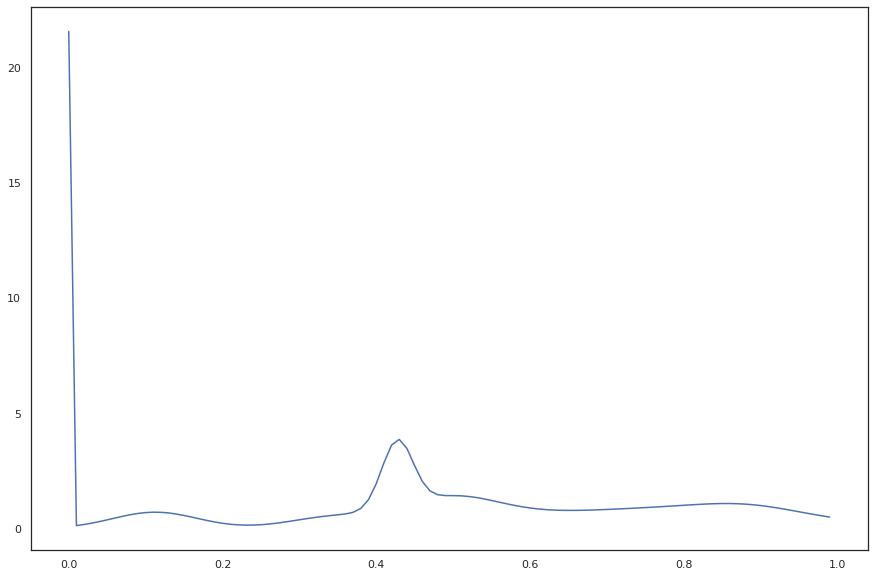

In [0]:
pi, mu, sigma = gmmtr1.weights_.flatten(), gmmtr1.means_.flatten(), np.sqrt(gmmtr1.covariances_.flatten())
grid = np.arange(np.min(tr1.iloc[:,3]), np.max(tr1.iloc[:,3]), 0.01)
plt.plot(grid, mix_pdf(grid, mu, sigma, pi), label='varying weights')

In [0]:
from sklearn.metrics import accuracy_score
from sklearn import mixture

def choosebestclassmatchgmm(obj):
    a= [gmmtr1.score(obj) ,gmmtr2.score(obj),gmmtr3.score(obj)]
    classi=a.index(max(a))
    return classi


accuracies=[]
for i in range(1,50):
  
      gmmtr1 = mixture.GaussianMixture(n_components=i, covariance_type='diag',max_iter=500)
      gmmtr1.fit(tr1)
      gmmtr2 = mixture.GaussianMixture(n_components=i, covariance_type='diag',max_iter=500)
      gmmtr2.fit(tr2)
      gmmtr3 = mixture.GaussianMixture(n_components=i, covariance_type='diag',max_iter=500)
      gmmtr3.fit(tr3)

      predict=[]
      for i in range(len(X_test)):
              predict.append(choosebestclassmatchgmm(X_test.iloc[i,:].values.reshape(1, -1)))
      at=accuracy_score(predict,y_test)
      print(at)
      accuracies.append(at)

0.7589563862928349
0.7842679127725857
0.830607476635514
0.8485202492211839
0.8820093457943925
0.8788940809968847
0.8905763239875389
0.8703271028037384
0.8921339563862928
0.8726635514018691
0.9080996884735203
0.9065420560747663
0.9057632398753894
0.9209501557632399
0.9135514018691588
0.926791277258567
0.9252336448598131
0.9244548286604362
0.9232866043613707
0.9190031152647975
0.932632398753894
0.9279595015576324
0.9353582554517134
0.9380841121495327
0.9291277258566978
0.9427570093457944
0.9310747663551402
0.9291277258566978
0.9396417445482866
0.9334112149532711
0.9388629283489096
0.9361370716510904
0.9466510903426791
0.9369158878504673
0.9373052959501558
0.9454828660436138
0.9411993769470405
0.9353582554517134
0.9462616822429907
0.9513239875389408
0.9404205607476636
0.9521028037383178
0.9497663551401869
0.9443146417445483
0.9521028037383178
0.9501557632398754
0.9532710280373832
0.9505451713395638
0.9548286604361371


Text(0, 0.5, 'Accuracy score')

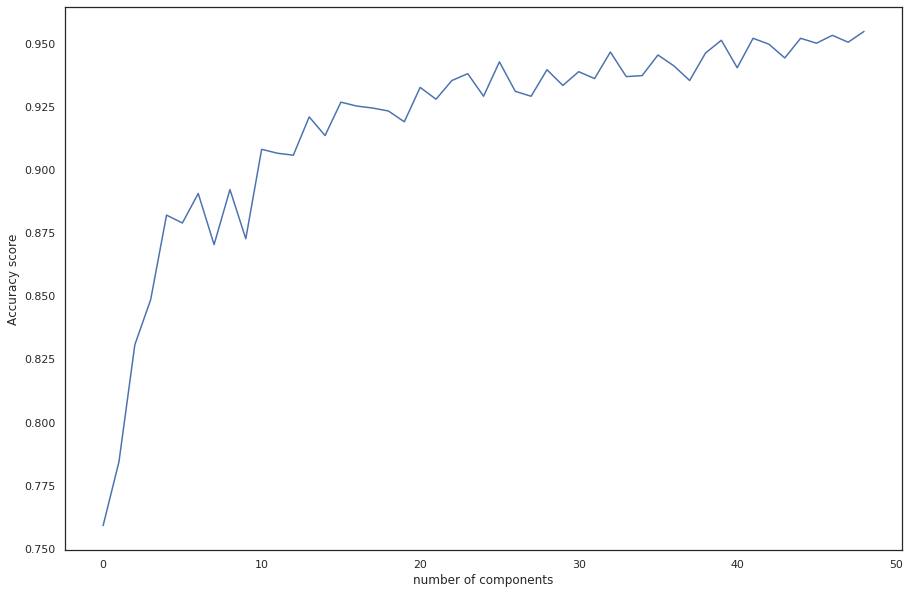

In [0]:
import matplotlib.pyplot as plt
plt.plot(accuracies)
plt.xlabel("number of components")
plt.ylabel("Accuracy score")

In [0]:
accuracys = []
lim=7
from sklearn.metrics import accuracy_score

def choosebestclassmatchgmm(obj):
    a= [gmmtr1.score(obj) ,gmmtr2.score(obj),gmmtr3.score(obj)]
    classi=a.index(max(a))
    return classi


#X_ubm, X_test, y_ubm, y_test = train_test_split(datax, datay, test_size=0.5,random_state=0, stratify=datay)
components_number=25
for i in range(10):
    X_ubm, X_test, y_ubm, y_test = train_test_split(datax, datay, test_size=0.5, stratify=datay)
    X_gmm, X_val, y_gmm,y_val = train_test_split(X_test, y_test, test_size=0.4, stratify=y_test)
    

    X_train['trans']=y_train 
    lim=7
    tr1=X_train.loc[X_train['trans'] == 0].iloc[:,0:lim]
    tr2=X_train.loc[X_train['trans'] == 1].iloc[:,0:lim]
    tr3=X_train.loc[X_train['trans'] == 2].iloc[:,0:lim] 

    gmmtr1 = mixture.GaussianMixture(n_components=components_number, covariance_type='diag',max_iter=500)
    gmmtr1.fit(tr1)
    gmmtr2 = mixture.GaussianMixture(n_components=components_number, covariance_type='diag',max_iter=500)
    gmmtr2.fit(tr2)
    gmmtr3 = mixture.GaussianMixture(n_components=components_number, covariance_type='diag',max_iter=500)
    gmmtr3.fit(tr3)

    predict=[]
    for i in range(len(X_test)):
            predict.append(choosebestclassmatchgmm(X_test.iloc[i,:].values.reshape(1, -1)))
    at=accuracy_score(predict,y_test)
    print(at)
    accuracies.append(at)


In [0]:
predictval

[0]

In [0]:
predictval=[]
def choosebestclassmatchgmm(obj):
    a= [gmmtr1.score(obj) ,gmmtr2.score(obj),gmmtr3.score(obj)]
    classi=a.index(max(a))
    return classi


for i in range(len(X_val)):
    predictval.append(choosebestclassmatchgmm(X_val.iloc[i,:].values.reshape(1, -1)))
at=accuracy_score(predictval,y_val)
print(at)    

0.9383321653819201


In [0]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from sklearn.metrics import precision_score
print(classification_report(y_val,predictval))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       396
           1       0.99      0.96      0.98      1795
           2       0.96      0.88      0.92       663

    accuracy                           0.94      2854
   macro avg       0.89      0.92      0.90      2854
weighted avg       0.95      0.94      0.94      2854



Confusion matrix, without normalization
[[ 366    6   24]
 [  65 1729    1]
 [  75    5  583]]


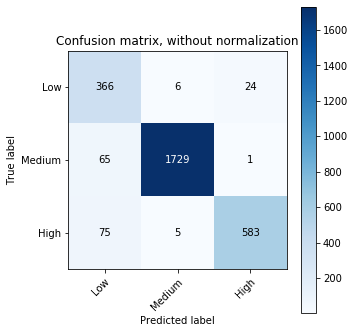

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,size,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(size,size))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
  #{'Alta':2,'Baja':0,'Media':1}
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
a=np.array([0,1,2])
a=np.array(['Low','Medium','High'])
plot_confusion_matrix(y_val,predictval,a,size=5)

Other Clasifiers

In [0]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grcomponents_number=25
id_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [0]:
datax= dats.iloc[:,:7]
datay= dats.label
X =datax
y =datay

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

models1 = {
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC()
}

params1 = {
    'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}
helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X, y, scoring='accuracy', n_jobs=2)
helper1.score_summary()

Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    3.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    2.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:   26.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for SVC.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


ExtraTreesClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
SVC


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:  2.7min finished
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,estimator,min_score,mean_score,max_score,std_score,C,gamma,kernel,learning_rate,n_estimators
1,ExtraTreesClassifier,0.718023,0.797896,0.939507,0.100408,NaN,NaN,NaN,NaN,32
3,RandomForestClassifier,0.71747,0.79665,0.925111,0.0916519,NaN,NaN,NaN,NaN,32
0,ExtraTreesClassifier,0.719684,0.784376,0.910161,0.0889552,NaN,NaN,NaN,NaN,16
2,RandomForestClassifier,0.720792,0.781331,0.900471,0.0842483,NaN,NaN,NaN,NaN,16
7,GradientBoostingClassifier,0.676218,0.752538,0.816445,0.0579163,NaN,NaN,NaN,0.8,32
9,GradientBoostingClassifier,0.640504,0.745893,0.856589,0.0882962,NaN,NaN,NaN,1,32
6,GradientBoostingClassifier,0.67608,0.738141,0.780592,0.0448639,NaN,NaN,NaN,0.8,16
8,GradientBoostingClassifier,0.647148,0.73002,0.81866,0.070138,NaN,NaN,NaN,1,16
12,SVC,0.61531,0.615356,0.615449,6.52553e-05,1,0.001,rbf,NaN,NaN
13,SVC,0.61531,0.615356,0.615449,6.52553e-05,1,0.0001,rbf,NaN,NaN


# guajira

In [0]:
datos =  pd.read_csv("guajira.csv")
datos

/content/drive/My Drive/bioacustica/Resultadosenero07


,name,ACIf,ESM,MD,NDSI,MID,FM,WE,CF,SC,SB,Tonnets,ADIm1,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,label,hora,etapa,grabadora,zone
0,/media/microp/DavidDD/bioacustica/2016/302151/...,0.895452,0.867282,0.467304,0.966325,0.018405,0.648280,0.029465,0.001836,0.377291,0.552523,0.587895,0.920963,0.945029,0.867738,0.896951,0.810338,0.778639,0.536468,0.877493,0.912124,1,0,4,OLO-302151__0__2016,g
1,/media/microp/DavidDD/bioacustica/2016/302151/...,0.895488,0.908406,0.453123,0.980696,0.003067,0.652910,0.028795,0.001952,0.386899,0.559192,0.583475,0.875070,0.881452,0.807069,0.810283,0.804210,0.747379,0.537879,0.883287,0.894554,1,0,4,OLO-302151__0__2016,g
2,/media/microp/DavidDD/bioacustica/2016/302151/...,0.894475,0.914618,0.458898,0.906203,0.125767,0.658092,0.063776,0.000869,0.360998,0.724380,0.550503,0.927234,0.934141,0.849074,0.869873,0.734389,0.646573,0.598610,0.908381,0.942854,1,0,4,OLO-302151__0__2016,g
3,/media/microp/DavidDD/bioacustica/2016/302151/...,0.894351,0.925893,0.439432,0.929386,0.119632,0.649800,0.042596,0.001307,0.356602,0.651678,0.595691,0.905295,0.917064,0.849598,0.806129,0.790120,0.687616,0.603289,0.879746,0.877237,1,0,4,OLO-302151__0__2016,g
4,/media/microp/DavidDD/bioacustica/2016/302151/...,0.895155,0.910974,0.442196,0.981205,0.039877,0.638534,0.027250,0.002164,0.379340,0.582113,0.535492,0.902839,0.847248,0.852855,0.704368,0.811376,0.745813,0.658889,0.813718,0.951751,1,0,4,OLO-302151__0__2016,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21667,/home/david/Música/Bioacustica/2016/5071/20161...,0.887604,0.951083,0.474842,0.494545,1.000000,0.646617,0.223196,0.000315,0.040085,0.405549,0.567153,0.965974,0.883117,0.447054,0.219279,0.598607,0.543051,0.637110,0.856362,0.899736,2,8,4,/RMT2-5071__0__2016,g
21668,/home/david/Música/Bioacustica/2016/5071/20161...,0.891489,0.811300,0.450851,0.924019,0.153374,0.665792,0.089213,0.000180,0.077886,0.388360,0.597698,0.920283,0.889968,0.802586,0.586166,0.835712,0.865427,0.670497,0.835641,0.914526,2,21,4,/RMT2-5071__0__2016,g
21669,/home/david/Música/Bioacustica/2016/5071/20161...,0.888506,0.836212,0.405657,0.951088,0.190184,0.646272,0.038934,0.001247,0.123929,0.352639,0.599276,0.944941,0.903799,0.861288,0.803000,0.866115,0.849063,0.643144,0.873575,0.899527,2,1,4,/RMT2-5071__0__2016,g
21670,/home/david/Música/Bioacustica/2016/5071/20161...,0.889485,0.854535,0.455124,0.937530,0.165644,0.655932,0.097562,0.000184,0.073346,0.385557,0.572907,0.956522,0.908791,0.860708,0.698032,0.869949,0.818621,0.625914,0.900889,0.875480,2,22,4,/RMT2-5071__0__2016,g


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


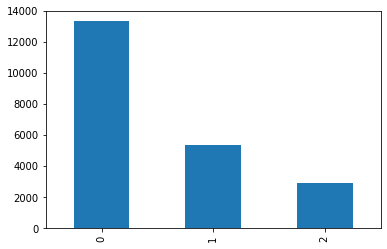

In [0]:
dafos=datos.drop_duplicates(subset=['ACIf', 'ESM','MD'],keep=False)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datos.iloc[:,1:21] = scaler.fit_transform(datos.iloc[:,1:21])
normalized_df = datos[datos.label != 'na']
normalized_df['label'].value_counts().plot(kind='bar')

In [0]:
normalized_df['label'].value_counts()

0    13336
1     5394
2     2942
Name: label, dtype: int64

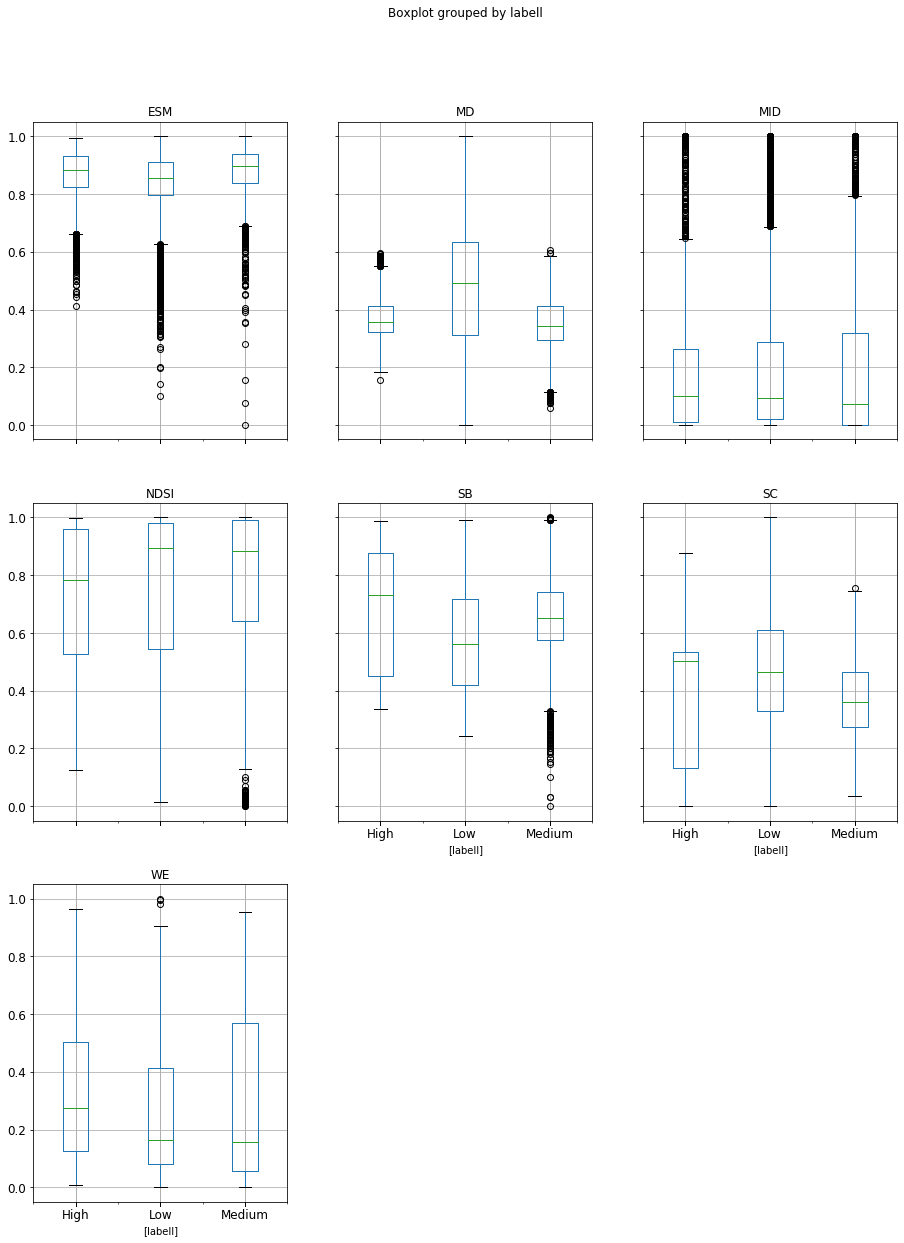

In [0]:
scalxlabel=normalized_df.copy()
trans={2:'High',0:'Low',1:'Medium'}
datay=[trans[item] for item in scalxlabel.label]
scalxlabel['labell']=datay
scalxlabel=scalxlabel[[ 'ESM', 'MD', 'NDSI', 'MID', 'WE', 'SC',
       'SB','labell']]

fig=scalxlabel.boxplot(figsize = (15,20),by='labell',fontsize='large')

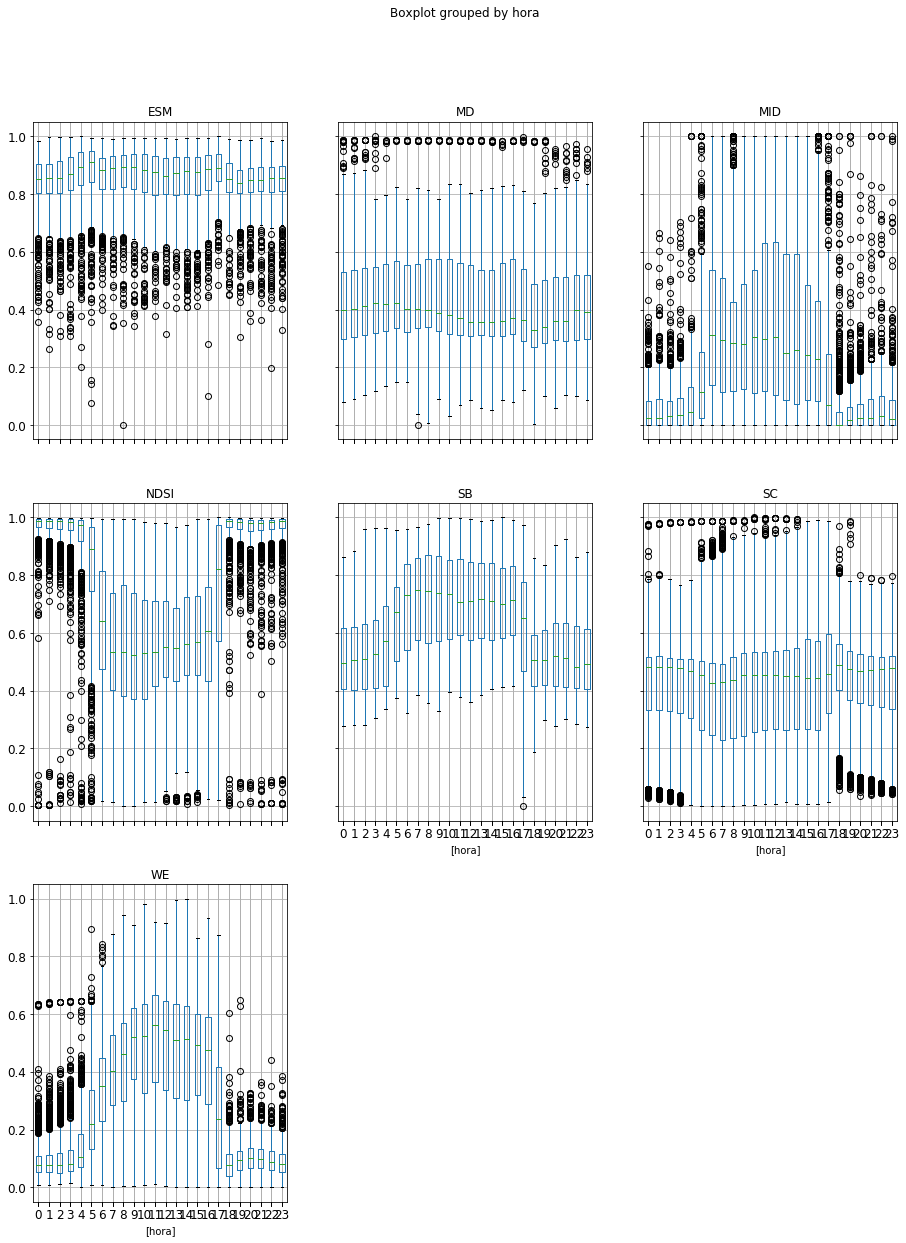

In [0]:
scalxlabel=normalized_df.copy()
trans={2:'alta',0:'baja',1:'media'}
datay=[trans[item] for item in scalxlabel.label]
scalxlabel['labell']=datay
scalxlabel=scalxlabel[[ 'ESM', 'MD', 'NDSI', 'MID', 'WE', 'SC',
       'SB','hora']]

fig=scalxlabel.boxplot(figsize = (15,20),by='hora',fontsize='large')

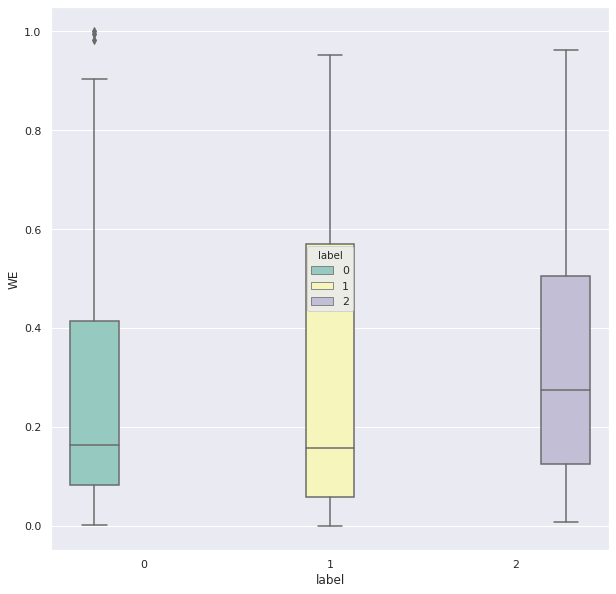

In [0]:

sns.set(rc={'figure.figsize':(10,10)})
ax = sns.boxplot(x="label", y="WE", hue="label", data=normalized_df, palette="Set3")

In [0]:
X=normalized_df.iloc[:,1:21]
y=normalized_df.label

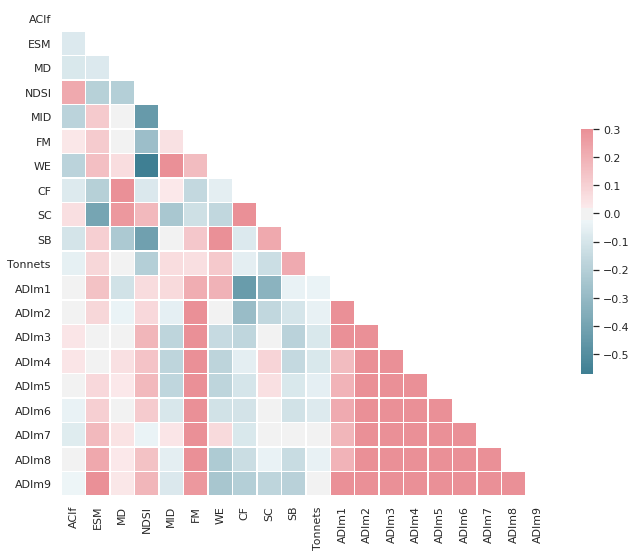

In [0]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset

# Compute the correlation matrix
corr = normalized_df.iloc[:,1:21].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<BarContainer object of 20 artists>

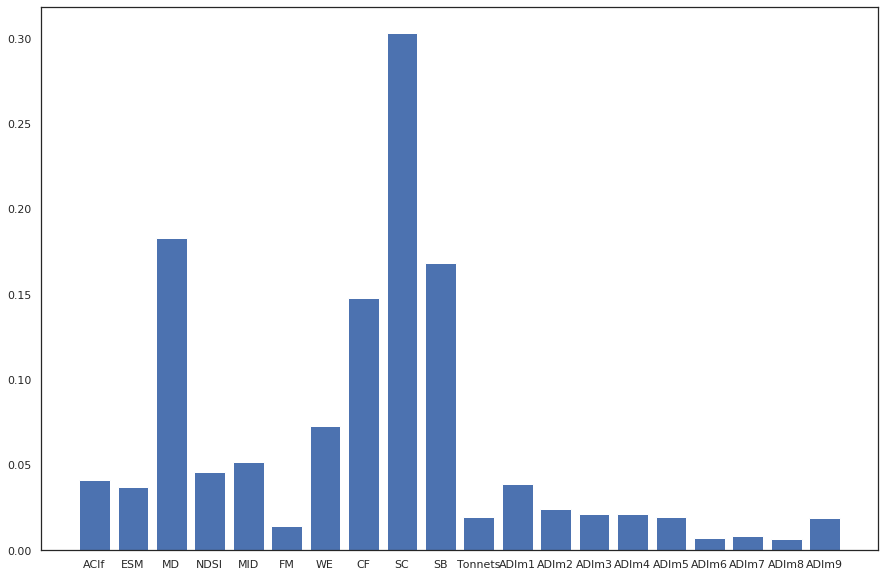

In [0]:
X=normalized_df.iloc[:,1:21]
y=normalized_df.label
md=sklearn.feature_selection.mutual_info_classif(X,y)
plt.bar(X.columns,md)

In [0]:
dats= normalized_df.drop(["name",	"ACIf","FM", "CF", "Tonnets"], axis=1)
dats
datax= dats.iloc[:,:7]
datay= dats.label

In [0]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
#datax=normalized_df.iloc[:,1:21]
#datay=normalized_df.label
X_train, X_test, y_train, y_test = train_test_split(datax.iloc[:,:16], datay, test_size=0.2, stratify=datay)
X_test, X_val, y_test,y_val = train_test_split(X_test, y_test, test_size=0.1, stratify=y_test)

In [0]:
#split data per class for train
X_train['trans']=y_train 
lim=7
tr1=X_train.loc[X_train['trans'] == 0].iloc[:,0:lim]
tr2=X_train.loc[X_train['trans'] == 1].iloc[:,0:lim]
tr3=X_train.loc[X_train['trans'] == 2].iloc[:,0:lim] 

In [0]:
      gmmtr1 = mixture.GaussianMixture(n_components=i, covariance_type='diag',max_iter=500)
      gmmtr1.fit(tr1)
      gmmtr2 = mixture.GaussianMixture(n_components=i, covariance_type='diag',max_iter=500)
      gmmtr2.fit(tr2)
      gmmtr3 = mixture.GaussianMixture(n_components=i, covariance_type='diag',max_iter=500)
      gmmtr3.fit(tr3)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=500,
                means_init=None, n_components=433, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn import mixture

def choosebestclassmatchgmm(obj):
    a= [gmmtr1.score(obj) ,gmmtr2.score(obj),gmmtr3.score(obj)]
    classi=a.index(max(a))
    return classi


accuracies=[]
for i in range(1,50):
  
      gmmtr1 = mixture.GaussianMixture(n_components=i, covariance_type='diag',max_iter=500)
      gmmtr1.fit(tr1)
      gmmtr2 = mixture.GaussianMixture(n_components=i, covariance_type='diag',max_iter=500)
      gmmtr2.fit(tr2)
      gmmtr3 = mixture.GaussianMixture(n_components=i, covariance_type='diag',max_iter=500)
      gmmtr3.fit(tr3)

      predict=[]
      for i in range(len(X_test)):
              predict.append(choosebestclassmatchgmm(X_test.iloc[i,:].values.reshape(1, -1)))
      at=accuracy_score(predict,y_test)
      print(at)
      accuracies.append(at)

0.6039477057164829
0.6800820302486542
0.6818764419379646
0.6767495513970777
0.7718533709305306
0.7698026147141759
0.8541399641117662
0.8464496283004358
0.8584978210715202
0.8766982824916688
0.8815688285055114
0.8682389130992053
0.8600358882337862
0.8736221481671367
0.8733658036400923
0.8702896693155601
0.8595231991796976
0.8797744168162009
0.8846449628300436
0.8754165598564471
0.8907972314791079
0.8838759292489106
0.8877210971545757
0.8905408869520636
0.8928479876954627
0.8972058446552166
0.8959241220199948
0.8979748782363497
0.891566265060241
0.9069469366829018
0.8987439118174827
0.9031017687772366
0.8990002563445271
0.9107921045885671
0.9051525249935913
0.9038708023583697
0.903358113304281
0.9043834914124583
0.9095103819533453
0.9097667264803897
0.9064342476288131
0.9089976928992566
0.9051525249935913
0.9054088695206357
0.9077159702640348
0.9172007177646757
0.9125865162778775
0.9130992053319662
0.9169443732376313


Text(0, 0.5, 'Accuracy score')

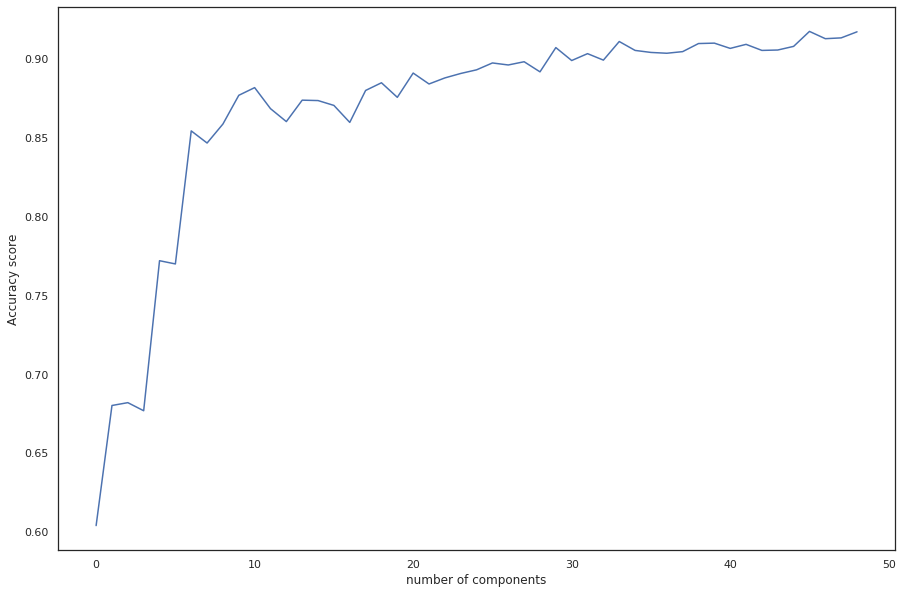

In [0]:
import matplotlib.pyplot as plt
plt.plot(accuracies)
plt.xlabel("number of components")
plt.ylabel("Accuracy score")

In [0]:
accuracys = []
lim=7
#X_ubm, X_test, y_ubm, y_test = train_test_split(datax, datay, test_size=0.5,random_state=0, stratify=datay)
components_number=30
for i in range(10):
    X_ubm, X_test, y_ubm, y_test = train_test_split(datax, datay, test_size=0.5, stratify=datay)
    X_gmm, X_val, y_gmm,y_val = train_test_split(X_test, y_test, test_size=0.4, stratify=y_test)
    

    X_train['trans']=y_train 
    lim=7
    tr1=X_train.loc[X_train['trans'] == 0].iloc[:,0:lim]
    tr2=X_train.loc[X_train['trans'] == 1].iloc[:,0:lim]
    tr3=X_train.loc[X_train['trans'] == 2].iloc[:,0:lim] 

    gmmtr1 = mixture.GaussianMixture(n_components=components_number, covariance_type='diag',max_iter=500)
    gmmtr1.fit(tr1)
    gmmtr2 = mixture.GaussianMixture(n_components=components_number, covariance_type='diag',max_iter=500)
    gmmtr2.fit(tr2)
    gmmtr3 = mixture.GaussianMixture(n_components=components_number, covariance_type='diag',max_iter=500)
    gmmtr3.fit(tr3)

    predict=[]
    for i in range(len(X_test)):
            predict.append(choosebestclassmatchgmm(X_test.iloc[i,:].values.reshape(1, -1)))
    at=accuracy_score(predict,y_test)
    print(at)
    accuracies.append(at)


0.9031930601698044
0.9014396456256921
0.9053156146179402
0.8961794019933554
0.9054078995939461
0.9036544850498339
0.8920265780730897
0.9004245108896272
0.9022702104097453
0.8998708010335917


In [0]:
predictval

[0]

In [0]:
predictval=[]
for i in range(len(X_val)):
    predictval.append(choosebestclassmatchgmm(X_val.iloc[i,:].values.reshape(1, -1)))
at=accuracy_score(predictval,y_val)
print(at)    

0.9354838709677419


In [0]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from sklearn.metrics import precision_score
print(classification_report(y_val,predictval))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       267
           1       0.98      0.91      0.94       108
           2       0.85      0.85      0.85        59

    accuracy                           0.94       434
   macro avg       0.92      0.91      0.91       434
weighted avg       0.94      0.94      0.94       434



Confusion matrix, without normalization
[[258   2   7]
 [  8  98   2]
 [  9   0  50]]


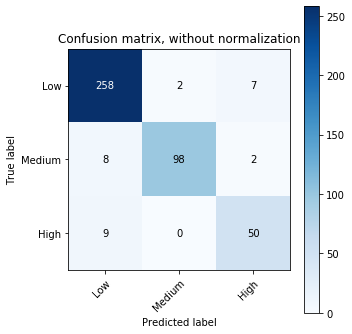

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,size,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(size,size))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
  #{'Alta':2,'Baja':0,'Media':1}
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
a=np.array([0,1,2])
a=np.array(['Low','Medium','High'])
plot_confusion_matrix(y_val,predictval,a,size=5)

Others


In [0]:
dats= normalized_df.drop(["name",	"ACIf","FM", "CF", "Tonnets"], axis=1)
dats
datax= dats.iloc[:,:7]
datay= dats.label

In [0]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [0]:

X =datax
y =datay

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

models1 = {
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC()
}

params1 = {
    'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}
helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X, y, scoring='accuracy', n_jobs=2)
helper1.score_summary()

Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    3.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    2.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:   26.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for SVC.
Fitting 3 folds for each of 6 candidates, totalling 18 fits
ExtraTreesClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
SVC


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:  2.7min finished
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,estimator,min_score,mean_score,max_score,std_score,C,gamma,kernel,learning_rate,n_estimators
3,RandomForestClassifier,0.734635,0.797388,0.922757,0.0886494,NaN,NaN,NaN,NaN,32
2,RandomForestClassifier,0.730066,0.795866,0.918328,0.0866741,NaN,NaN,NaN,NaN,16
1,ExtraTreesClassifier,0.71747,0.794804,0.925803,0.0931327,NaN,NaN,NaN,NaN,32
0,ExtraTreesClassifier,0.711379,0.786776,0.93314,0.103511,NaN,NaN,NaN,NaN,16
7,GradientBoostingClassifier,0.676218,0.752492,0.816445,0.0579065,NaN,NaN,NaN,0.8,32
9,GradientBoostingClassifier,0.640504,0.746078,0.856728,0.0883459,NaN,NaN,NaN,1,32
6,GradientBoostingClassifier,0.67608,0.738141,0.780592,0.0448639,NaN,NaN,NaN,0.8,16
8,GradientBoostingClassifier,0.647564,0.731497,0.818522,0.0698275,NaN,NaN,NaN,1,16
12,SVC,0.61531,0.615356,0.615449,6.52553e-05,1,0.001,rbf,NaN,NaN
13,SVC,0.61531,0.615356,0.615449,6.52553e-05,1,0.0001,rbf,NaN,NaN


Aparently RF works, but in the next cell we show overfiting 

In [0]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(datax.iloc[:,:16], datay, test_size=0.2, stratify=datay)
X_test, X_val, y_test,y_val = train_test_split(X_test, y_test, test_size=0.1, stratify=y_test)

clf = RandomForestClassifier(n_estimators=32,max_depth=2, random_state=0)
clf.fit(X_train,y_train)
predict=clf.predict(X_test)
accuracy_score(y_test,predict)

0.6549602665983081

# GMM-UBM 



In [0]:


import numpy as np
from sklearn import mixture
import gmm_adapt as MAP
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


datos= pd.read_csv('3etapas.csv')
datos= datos.drop(["name",	"ACIf","FM", "CF", "Tonnets"], axis=1)
#datos.rename(columns={'Unnamed: 0.1.1' :'name'}, inplace=True)
datos

/content/drive/My Drive/bioacustica/Resultadosfebrero


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ESM,MD,NDSI,MID,WE,SC,SB,ADIm1,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,label,hora,etapa
0,0.867282,0.467304,0.966325,0.018405,0.029465,0.377291,0.552523,0.920963,0.945029,0.867738,0.896951,0.810338,0.778639,0.536468,0.877493,0.912124,1,00,3.0
1,0.908406,0.453123,0.980696,0.003067,0.028795,0.386899,0.559192,0.875070,0.881452,0.807069,0.810283,0.804210,0.747379,0.537879,0.883287,0.894554,1,00,3.0
2,0.914618,0.458898,0.906203,0.125767,0.063776,0.360998,0.724380,0.927234,0.934141,0.849074,0.869873,0.734389,0.646573,0.598610,0.908381,0.942854,1,00,3.0
3,0.925893,0.439432,0.929386,0.119632,0.042596,0.356602,0.651678,0.905295,0.917064,0.849598,0.806129,0.790120,0.687616,0.603289,0.879746,0.877237,1,00,3.0
4,0.910974,0.442196,0.981205,0.039877,0.027250,0.379340,0.582113,0.902839,0.847248,0.852855,0.704368,0.811376,0.745813,0.658889,0.813718,0.951751,1,00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45581,0.850048,0.369156,0.584126,0.745399,0.077290,0.231847,0.543725,0.546510,0.246275,0.370992,0.663286,0.700649,0.830382,0.793665,0.875796,0.895937,1,23,3.0
45582,0.833907,0.338497,0.861142,0.233129,0.039242,0.215234,0.697241,0.884346,0.561873,0.389238,0.668778,0.575165,0.128117,0.258377,0.477471,0.677211,1,18,3.0
45583,0.803416,0.199186,0.787697,0.000000,0.229162,0.238528,0.706890,0.680332,0.773007,0.483451,0.528124,0.299106,0.032986,0.230472,0.245360,0.079700,1,13,2.0
45584,0.970575,0.392994,0.980522,0.061350,0.115595,0.256904,0.639992,0.946029,0.891831,0.806401,0.749585,0.637985,0.739558,0.723066,0.899706,0.858127,1,3,3.0


In [0]:
datax=datos.iloc[:,:7]
datay=datos.label
datax

,ESM,MD,NDSI,MID,WE,SC,SB
0,0.867282,0.467304,0.966325,0.018405,0.029465,0.377291,0.552523
1,0.908406,0.453123,0.980696,0.003067,0.028795,0.386899,0.559192
2,0.914618,0.458898,0.906203,0.125767,0.063776,0.360998,0.724380
3,0.925893,0.439432,0.929386,0.119632,0.042596,0.356602,0.651678
4,0.910974,0.442196,0.981205,0.039877,0.027250,0.379340,0.582113
...,...,...,...,...,...,...,...
45581,0.850048,0.369156,0.584126,0.745399,0.077290,0.231847,0.543725
45582,0.833907,0.338497,0.861142,0.233129,0.039242,0.215234,0.697241
45583,0.803416,0.199186,0.787697,0.000000,0.229162,0.238528,0.706890
45584,0.970575,0.392994,0.980522,0.061350,0.115595,0.256904,0.639992


In [0]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
X_ubm, X_test, y_ubm, y_test = train_test_split(datax, datay, test_size=0.5,random_state=0, stratify=datay)
X_gmm, X_val, y_gmm,y_val = train_test_split(X_test, y_test, test_size=0.4, random_state=0, stratify=y_test)

print(X_ubm.shape)
print(X_gmm.shape)
print(X_val.shape)

(22793, 7)
(13675, 7)
(9118, 7)


# Bhattacharyya distance


With the data we need to declare a few functions. dst_bhat_o calcule the Bhattacharyya distance (https://en.wikipedia.org/wiki/Bhattacharyya_distance) of two gmm objects.

The choosebestclassmatch function return the min distance of a gmm object to the tree gmm adapted train classes. 

The predict function receive the UBM and do a adaptation of the new data. You can choose the size of the input data. 

In [0]:
def dst_bhat_O(spk_model_train1,spk_model_test1):
    u1 = spk_model_train1.means_
    u2 = spk_model_test1.means_
    cov1 = spk_model_train1.covariances_
    cov2 = spk_model_test1.covariances_
    param1 = 0
    param2 = 0
    for i in range(u1.shape[0]):
        du = u2[i,:]-u1[i,:]
        du = np.reshape(du,(len(du),1))
        dcov = (np.diag(cov1[i,:])+np.diag(cov2[i,:]))/2
        temp = np.matmul(du.T,np.linalg.inv(dcov))
        param1 += np.matmul(temp,du)[0][0]
        param2 += np.log(np.linalg.det(dcov)/np.sqrt(np.linalg.det(np.diag(cov1[i,:]))*np.linalg.det(np.diag(cov2[i,:]))))

    bha = (0.125*param1)+(0.5*param2)#Without weigths
    return bha

def choosebestclassmatch(obj):
    a= [dst_bhat_O(gmmbaja,obj),dst_bhat_O(gmmmedia,obj),dst_bhat_O(gmmalta,obj)]
    classi=a.index(min(a))
    return classi

#the pred function have as input a dataframe object 
def pred(dataf,UBMM,size):
    predict=[]
    for i in range(0,len(dataf)//size):
        j=i*size
        mapobj = MAP.ubm_map(UBMM,dataf.iloc[j:j+size,:],mode='011')
        predict.append(choosebestclassmatch(mapobj))
    return predict

Next we split the data:

tr is for training each gmm adapted,
te is to test the UBM-Aproach, y are the labels 

In [0]:

lim=7
test=X_val.copy()
test['trans']=y_test.copy()
X_gmm['trans']=y_gmm.copy()
tr1=X_gmm.loc[X_gmm['trans'] == 0].iloc[:,:lim]
tr2=X_gmm.loc[X_gmm['trans'] == 1].iloc[:,:lim]
tr3=X_gmm.loc[X_gmm['trans'] == 2].iloc[:,:lim]
tests=test.copy()


te1=tests.loc[tests['trans'] == 0].iloc[:,:lim]
te2=tests.loc[tests['trans'] == 1].iloc[:,:lim]
te3=tests.loc[tests['trans'] == 2].iloc[:,:lim]
ytests=test['trans']

y1=[0 for i in range(len(te1)//10)]
y2=[1 for i in range(len(te2)//10)]
y3=[2 for i in range(len(te3)//10)]
ytotal=[]
ytotal=y1.copy()
ytotal.extend(y2)
ytotal.extend(y3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


So, we do a grid search for the number of gaussians parameter using the variables. we used a Diagonal covariance 

In [0]:
#{'Alta':2,'Baja':0,'Media':1}
import warnings
warnings.filterwarnings("ignore")

c = np.zeros(7)
for i in range(2,15):
    ngauss = 1 #Number of Gaussians

    UBM = mixture.GaussianMixture(n_components=i, covariance_type='diag',n_init=100,random_state=1)
    UBM.fit(X_ubm)

    gmmbaja = MAP.ubm_map(UBM,tr1,mode='011')
    gmmmedia= MAP.ubm_map(UBM,tr2,mode='011')
    gmmalta= MAP.ubm_map(UBM,tr3,mode='011')
    print('number*********************************',i)
    p1=pred(te1,UBM,10)
    p2=pred(te2,UBM,10)
    p3=pred(te3,UBM,10)

    predtotal=[]
    predtotal=p1.copy()
    predtotal.extend(p2)
    predtotal.extend(p3)
    at=accuracy_score(ytotal, predtotal)
    print(at)
    c[i]=at
print('Accuracy total',c)

In [0]:
plt.plot(c)
plt.xlabel('number of components')
plt.ylabel('accuracy')

10-fold crossvalidation


In [0]:
accuracys = []
import warnings
warnings.filterwarnings("ignore")
#X_ubm, X_test, y_ubm, y_test = train_test_split(datax, datay, test_size=0.5,random_state=0, stratify=datay)
n_components=2

X=datax
y=datay
kfold=4
skf=StratifiedKFold(n_splits=kfold)
lim=7
for i in range(10):
    X_ubm, X_test, y_ubm, y_test = train_test_split(datax, datay, test_size=0.5, stratify=datay)
    X_gmm, X_val, y_gmm,y_val = train_test_split(X_test, y_test, test_size=0.4, stratify=y_test)
    
    UBM = mixture.GaussianMixture(n_components=2, covariance_type='diag',n_init=100,random_state=1)
    UBM.fit(X_ubm) 
    
    test=X_test.copy()
    test['trans']=y_test
    X_gmm['trans']=y_gmm
    tr1=X_gmm.loc[X_gmm['trans'] == 0].iloc[:,0:lim]
    tr2=X_gmm.loc[X_gmm['trans'] == 1].iloc[:,0:lim]
    tr3=X_gmm.loc[X_gmm['trans'] == 2].iloc[:,0:lim]
    tests=test.copy()
    
    te1=tests.loc[tests['trans'] == 0].iloc[:,0:lim]
    te2=tests.loc[tests['trans'] == 1].iloc[:,0:lim]
    te3=tests.loc[tests['trans'] == 2].iloc[:,0:lim]
    ytests=test['trans']
   
    gmmbaja = MAP.ubm_map(UBM,tr1,mode='011')
    gmmmedia= MAP.ubm_map(UBM,tr2,mode='011')
    gmmalta= MAP.ubm_map(UBM,tr3,mode='011')
    print('iteracion*********************************',i)
    p1=pred(te1,UBM,10)
    p2=pred(te2,UBM,10)
    p3=pred(te3,UBM,10)
    
    y1=[0 for i in range(len(te1)//10)]
    y2=[1 for i in range(len(te2)//10)]
    y3=[2 for i in range(len(te3)//10)]
    ytotal=[]
    ytotal=y1.copy()
    ytotal.extend(y2)
    ytotal.extend(y3)
    
    predtotal=[]
    predtotal=p1.copy()
    predtotal.extend(p2)
    predtotal.extend(p3)

    at=accuracy_score(ytotal, predtotal)
    print(at)
    accuracys.append(at)

In [0]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from sklearn.metrics import precision_score
print(classification_report(ytotal,predtotal))

GMM used with three zones 

In [0]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datax, datay, test_size=0.5,random_state=0, stratify=datay)


In [0]:
#split data per class for train
X_train['trans']=y_train 
lim=7
tr1=X_train.loc[X_train['trans'] == 0].iloc[:,0:lim]
tr2=X_train.loc[X_train['trans'] == 1].iloc[:,0:lim]
tr3=X_train.loc[X_train['trans'] == 2].iloc[:,0:lim] 

In [0]:
from sklearn.metrics import accuracy_score
from sklearn import mixture

def choosebestclassmatchgmm(obj):
    a= [gmmtr1.score(obj) ,gmmtr2.score(obj),gmmtr3.score(obj)]
    classi=a.index(max(a))
    return classi


accuracies=[]
for i in range(1,50):
  
      gmmtr1 = mixture.GaussianMixture(n_components=i, covariance_type='diag',max_iter=500)
      gmmtr1.fit(tr1)
      gmmtr2 = mixture.GaussianMixture(n_components=i, covariance_type='diag',max_iter=500)
      gmmtr2.fit(tr2)
      gmmtr3 = mixture.GaussianMixture(n_components=i, covariance_type='diag',max_iter=500)
      gmmtr3.fit(tr3)

      predict=[]
      for i in range(len(X_test)):
              predict.append(choosebestclassmatchgmm(X_test.iloc[i,:].values.reshape(1, -1)))
      at=accuracy_score(predict,y_test)
      print(at)
      accuracies.append(at)

0.41591716755144126
0.505023472118633
0.5306453735796077
0.5771070065370947
0.5976834993199667
0.6302373535734656
0.6301057342166455
0.6806475672355548
0.7016627912078269
0.6863949458166981
0.7099109375685517
0.708638617119291
0.710349668757952
0.729215109902163
0.7291712367832229
0.7418066950379503
0.7472908349054534
0.7444390821743517
0.7484754091168341
0.750098714517615
0.756942921072259
0.7739218181020489
0.77589610845435
0.7748431535997894
0.7841442548150748
0.7919097968674593
0.7814679945597333
0.789716140920458
0.7938402141008204
0.7943228184091607
0.7974816829728425
0.8004650550607643
0.8011670249638047
0.8045452551221867
0.8095029175624096
0.7991049883736234
0.8025709647698855
0.8187601456587549
0.8044575088843066
0.815469661738253
0.8131005133154916
0.8105997455359102
0.8153380423814329
0.8211731672004563
0.8228403457201773
0.829333567323301
0.8238055543368578
0.8252972403808186
0.8252094941429386


Text(0, 0.5, 'Accuracy score')

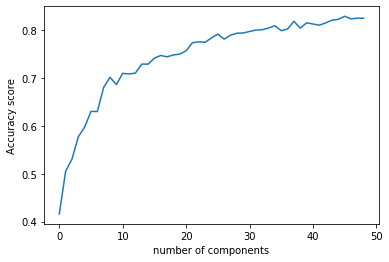

In [0]:
import matplotlib.pyplot as plt
plt.plot(accuracies)
plt.xlabel("number of components")
plt.ylabel("Accuracy score")